# This task help us to understand that how PCA makes our work easy while choosing number of clusters

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as sch #to draw dendrogram
from sklearn.cluster import AgglomerativeClustering #for model building using hierarchical clustering
from sklearn.cluster import KMeans #for model building using kmeans clustering
import seaborn as sns


In [2]:
data = pd.read_csv("wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA

In [3]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


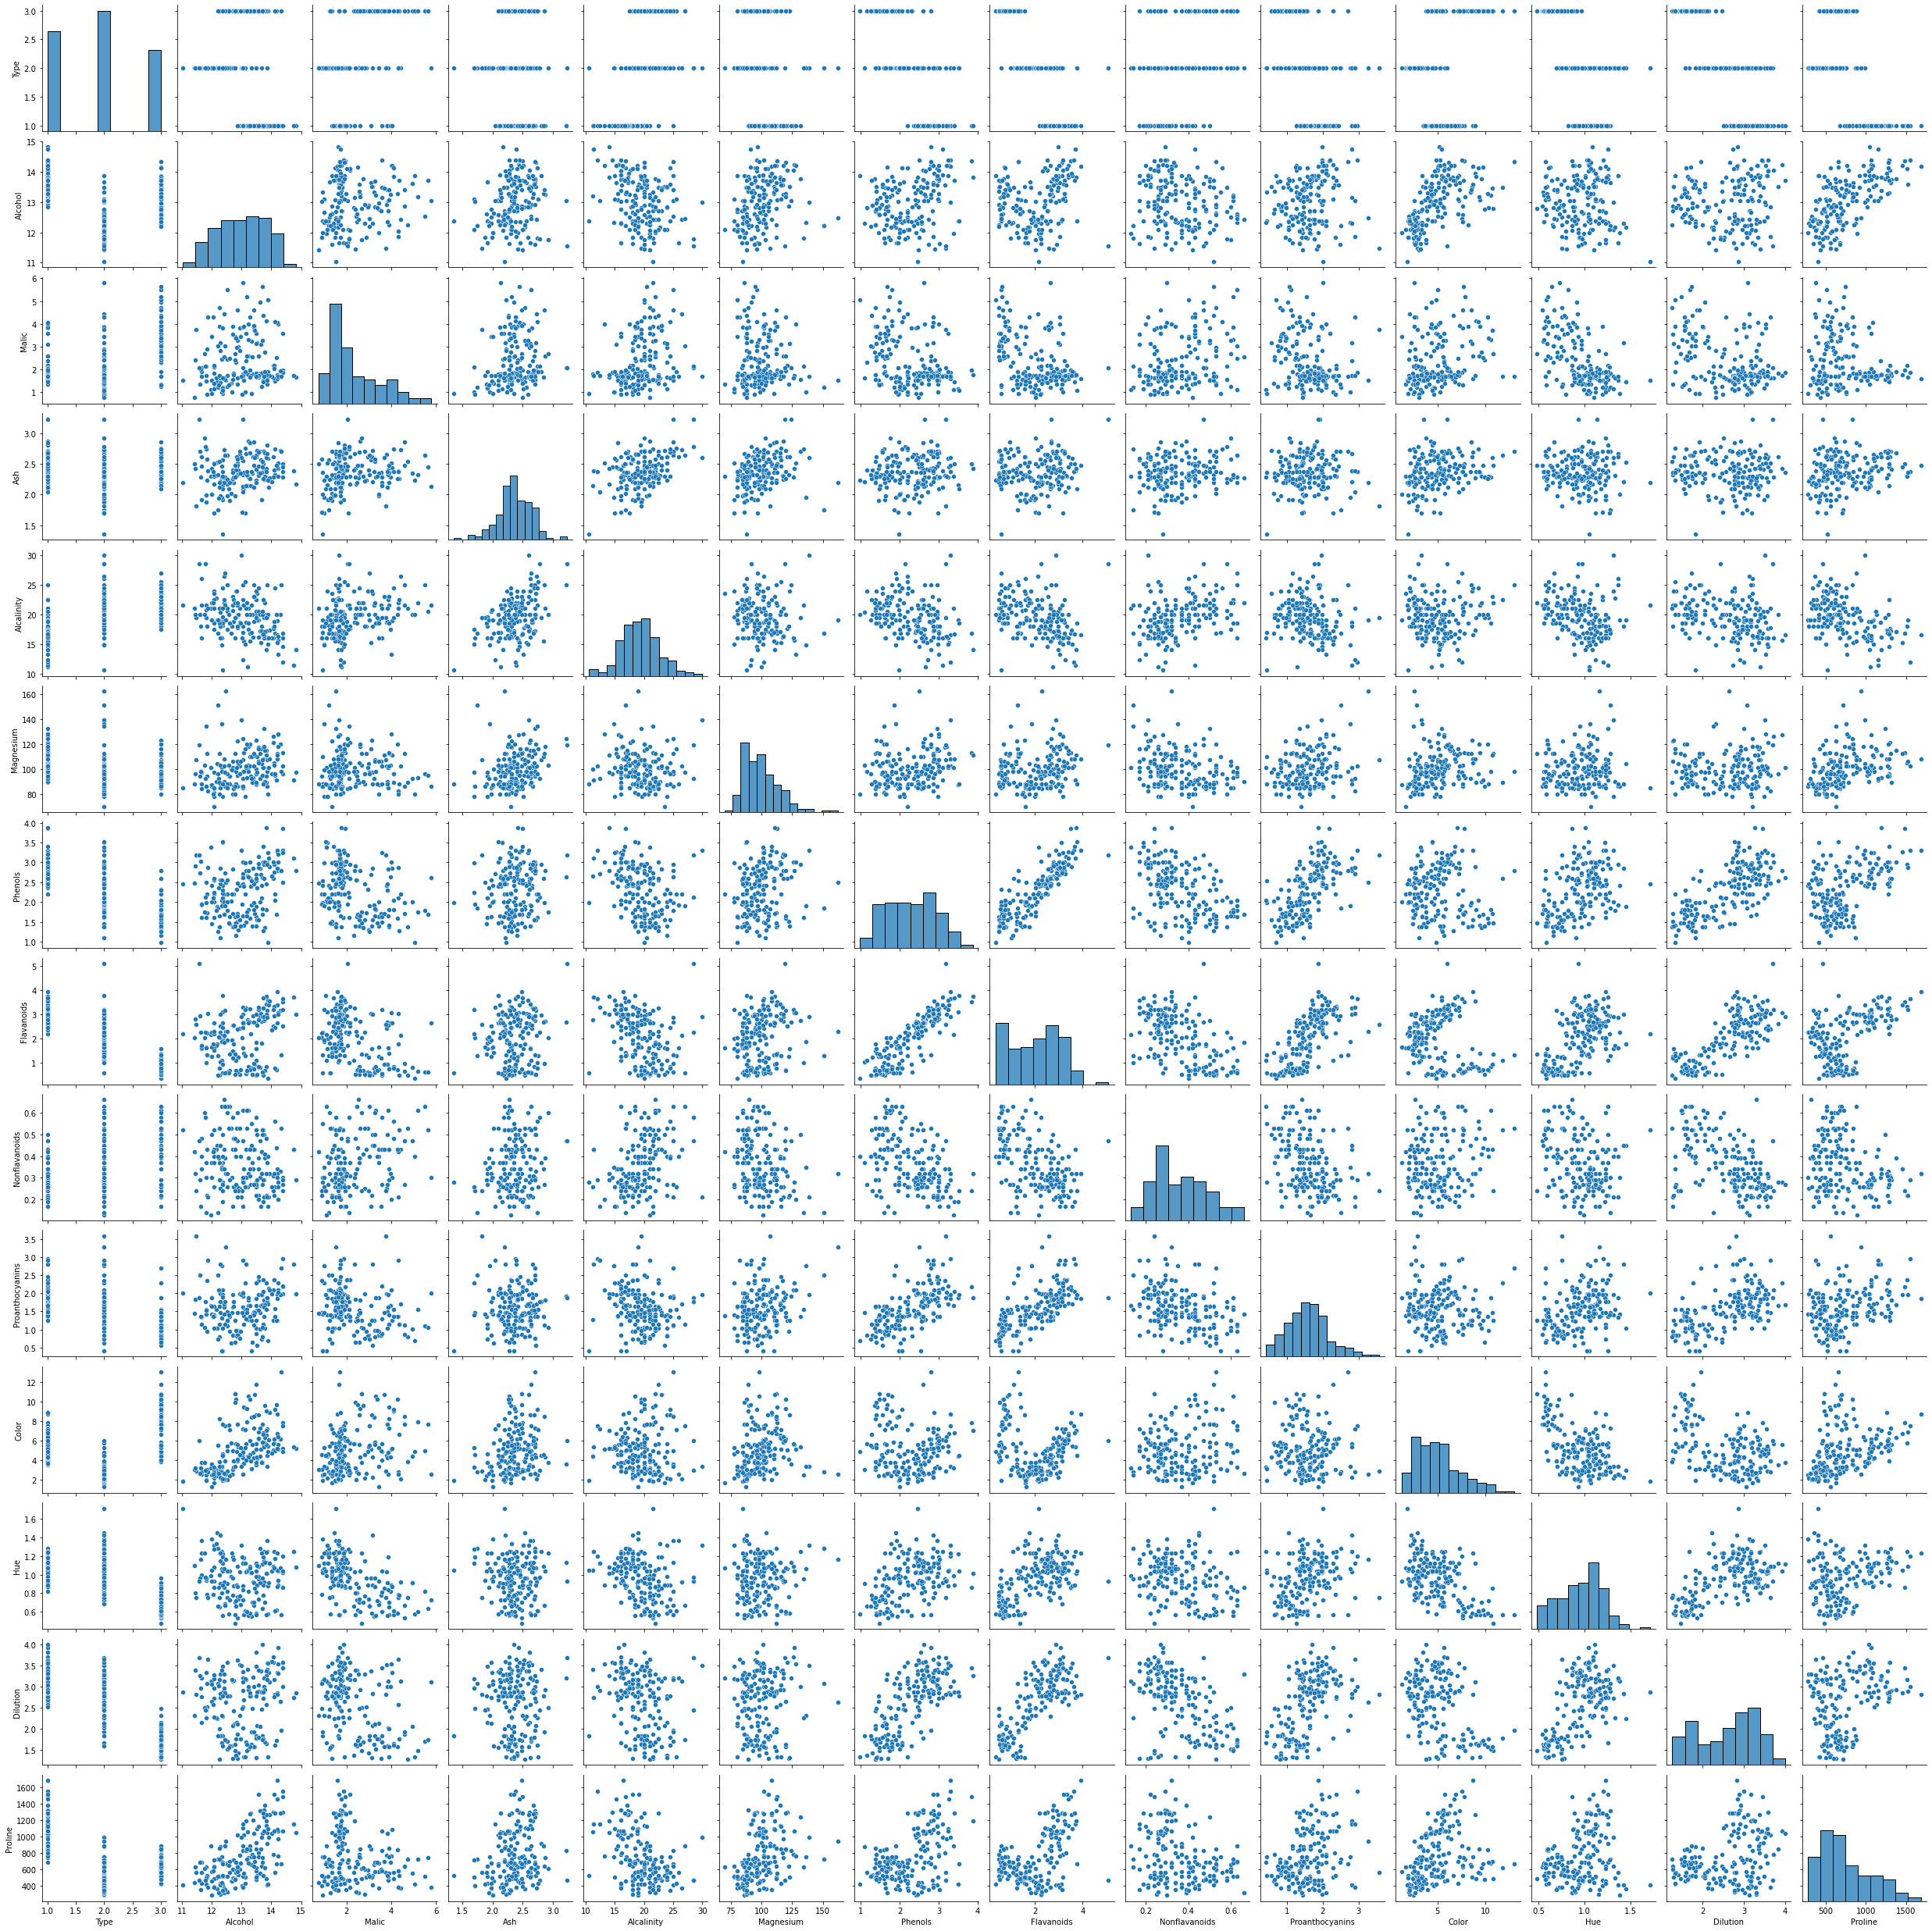

In [5]:
sns.pairplot(pd.DataFrame(data))

In [6]:
data.shape

(178, 14)

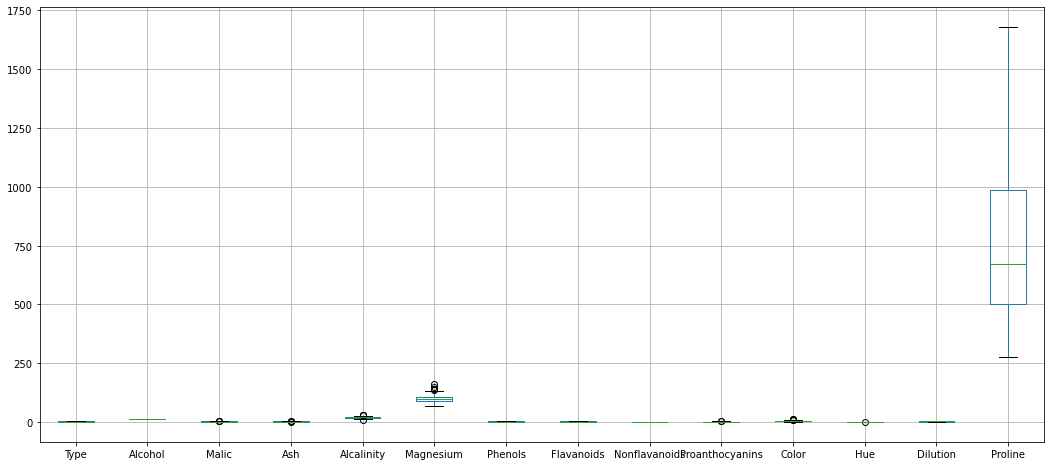

In [7]:
plt.figure(figsize = (18,8))
boxplot = data.boxplot()
#obesrev that there ar eoutliers in few plots

In [8]:
#Normalising the data set(numerical column)
uni_data = scale(data)
uni_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

In [9]:
pca = PCA()
pca_values = pca.fit_transform(uni_data)
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [10]:
#The amount of variance that each PCA explains is
pca.explained_variance_

array([5.56722458, 2.51118402, 1.45424413, 0.9331603 , 0.88246016,
       0.67657935, 0.55692777, 0.35201176, 0.29620602, 0.26378805,
       0.2271244 , 0.16975037, 0.13029618, 0.05813894])

In [11]:
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [12]:
#cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [13]:
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

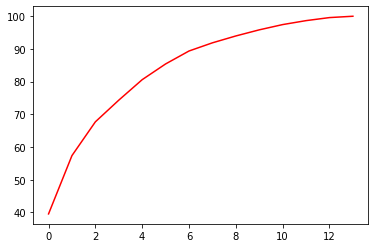

In [14]:
#variance plot for PCA components obtained
plt.plot(var1,color="red")

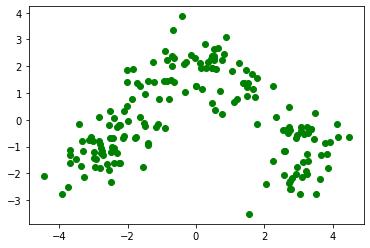

In [15]:
#plot betn PC1 and PC2
x = pca_values[:,0]
y = pca_values[:,1]
z = pca_values[:,2]
#w = pca_values[:,3]
plt.scatter(x,y,color = 'green')

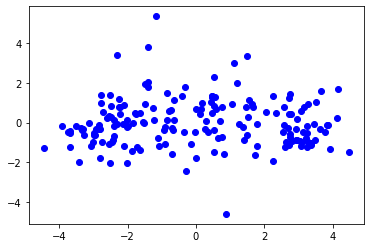

In [16]:
plt.scatter(x,z,color = 'blue')

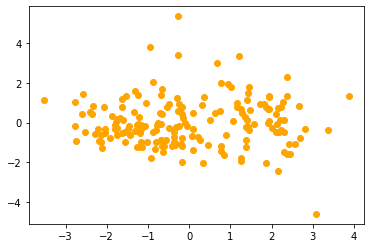

In [17]:
plt.scatter(y,z,color = 'orange')

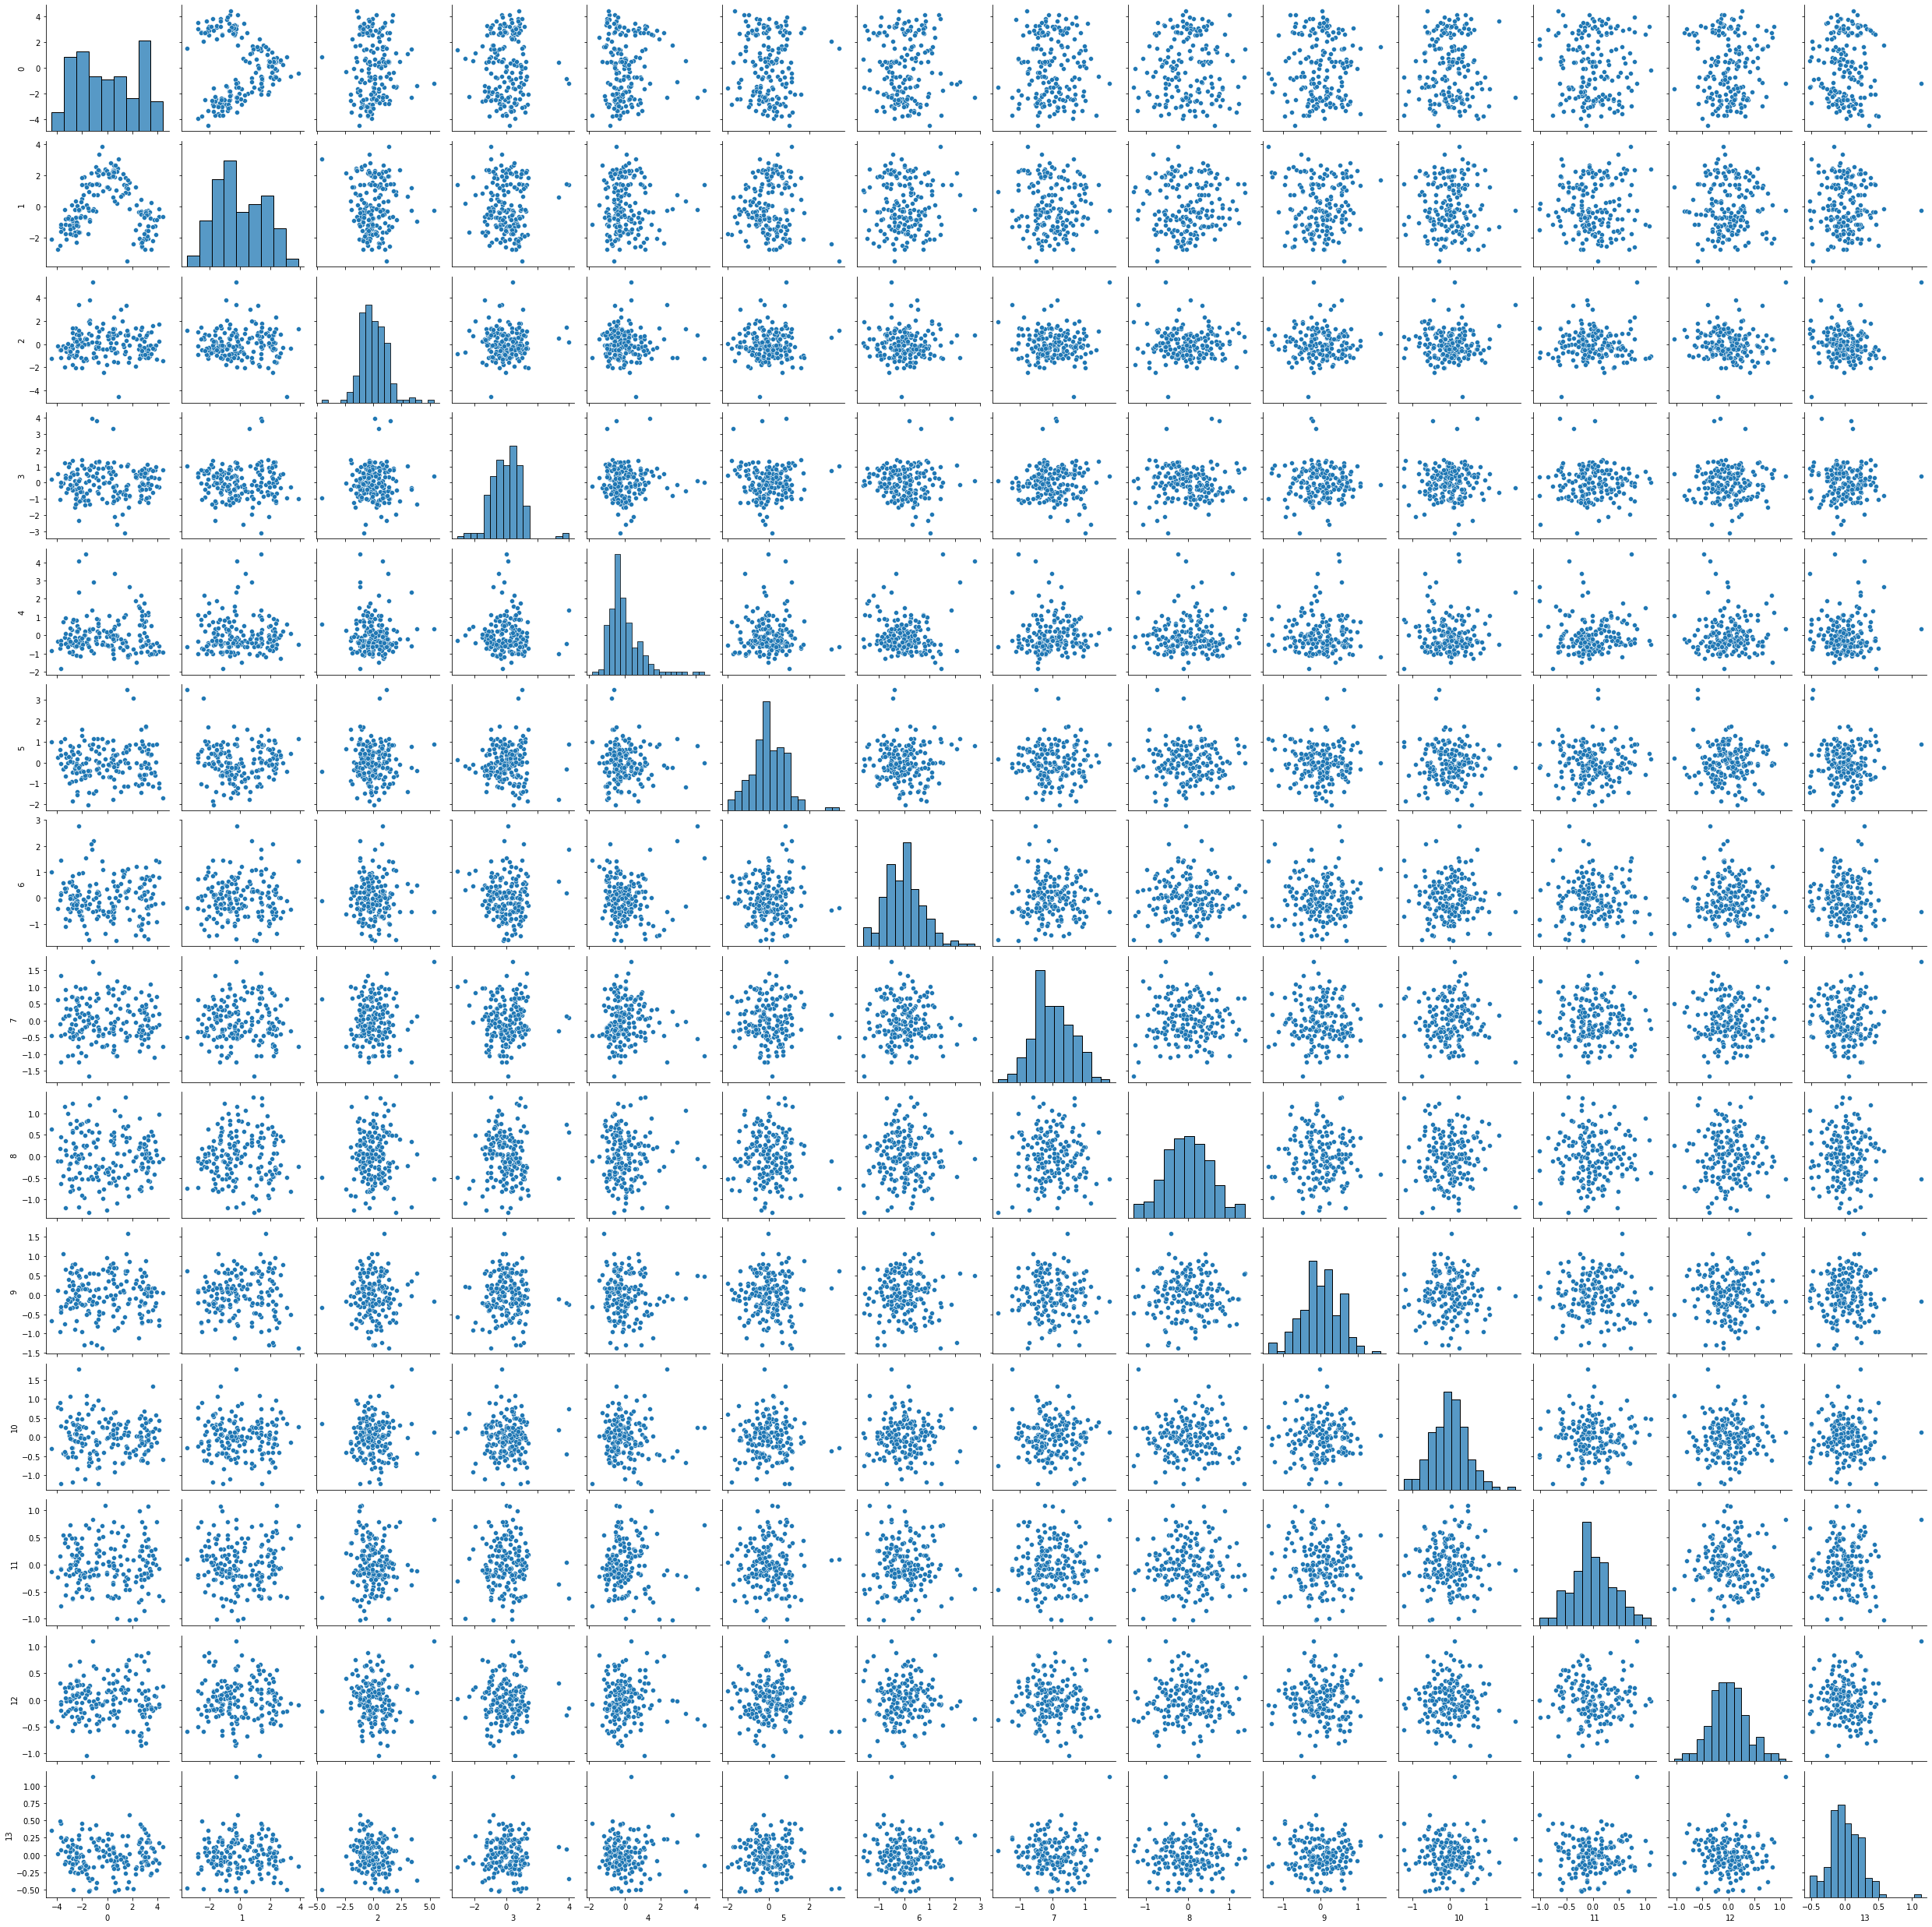

In [40]:
sns.pairplot(pd.DataFrame(pca_values))

#observe that there is no correlation check with original pairplot just below of this pairplot

In [41]:
finalDF = pd.concat([pd.DataFrame(pca_values[:,0:3],
                                 columns = ['pc1','pc2','pc3']),
                    data],axis = 1)
finalDF

,pc1,pc2,pc3,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-3.522934,-1.453098,-0.164795,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,-2.528858,0.330019,-2.026707,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,-2.785029,-1.036936,0.983238,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,-3.922588,-2.768210,-0.174968,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,-1.407511,-0.867773,2.025829,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,2.942729,-1.752263,0.207480,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3.027272,-2.756040,-0.940803,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2.755222,-2.293784,-0.550474,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [42]:
df2 = pd.DataFrame(finalDF.iloc[:,0:3])
df2

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


# Hierarchical Clustering

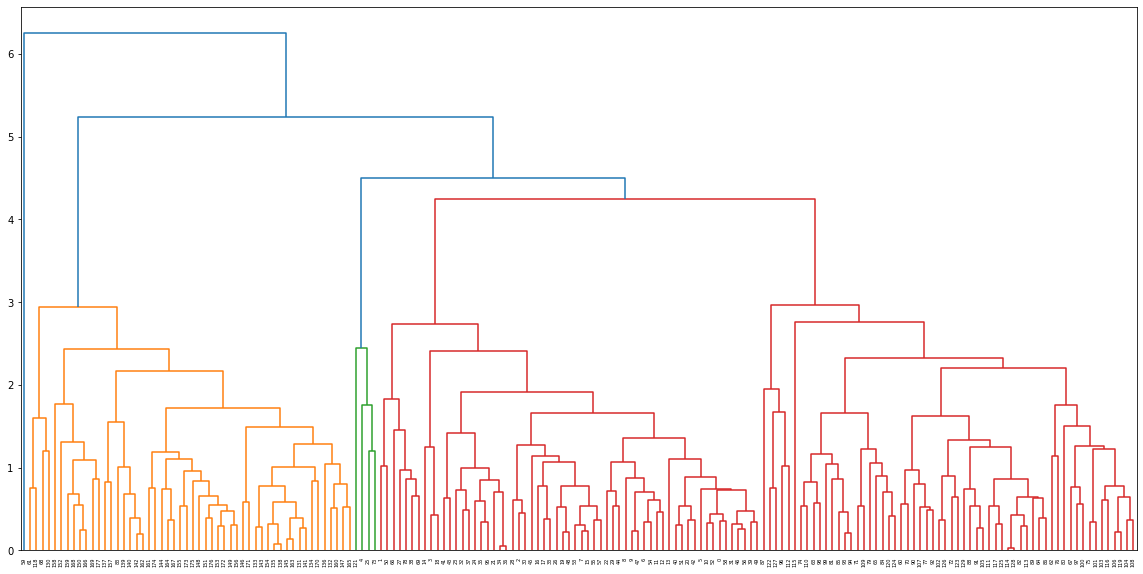

In [43]:
#create dendrogram
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(df2,method='average'))

In [44]:
#create clusters
hc = AgglomerativeClustering(n_clusters = 3,
                            affinity = 'euclidean',
                            linkage = 'average')
hc.fit_predict(df2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [45]:
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [46]:
df2['h_clusterid'] = hc.labels_
df2

,pc1,pc2,pc3,h_clusterid
0,-3.522934,-1.453098,-0.164795,0
1,-2.528858,0.330019,-2.026707,0
2,-2.785029,-1.036936,0.983238,0
3,-3.922588,-2.768210,-0.174968,0
4,-1.407511,-0.867773,2.025829,0
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,2
174,2.942729,-1.752263,0.207480,2
175,3.027272,-2.756040,-0.940803,2
176,2.755222,-2.293784,-0.550474,2


In [47]:
df2.groupby('h_clusterid').mean()

,pc1,pc2,pc3
h_clusterid,,,
0,-1.243723,0.430350,0.140042
1,0.874925,3.077724,-4.585646
2,2.972893,-1.093682,-0.248455


In [48]:
df2['h_clusterid'].value_counts()

0    125
2     52
1      1
Name: h_clusterid, dtype: int64

# KMEANS

In [49]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score
wcss = []
sil_score = []
cal_haz_score = []

for i  in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
    if i == 1:
        continue
        sil_score.append(silhouette_score(df2,kmeans.labels_))
        cal_haz_score.append(calinski_harabasz_score(df2,kmeans.labels_))


C:\Users\sneha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
wcss

[1834.3413323050286,
 946.6188062333247,
 496.9084788022941,
 415.2946163197704,
 361.7981698839949,
 316.59194166240303,
 284.71474160586314,
 253.6243364624249,
 230.23953941807406,
 212.20876219954565]

In [54]:
sil_score

[0.290174211789362]

In [58]:
cal_haz_score

[142.6887733637946]

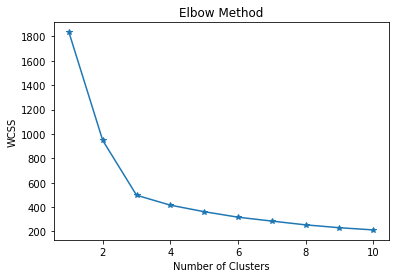

In [31]:
plt.plot(range(1,11),wcss,'*-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
#Selecting 3 number of cluster
k_clusterid = KMeans(n_clusters = 3,random_state=42)
k_clusterid.fit(df2)

KMeans(n_clusters=3, random_state=42)

In [33]:
k_clusterid.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [34]:
df2["k_clusterid"] = k_clusterid.labels_
df2

,pc1,pc2,pc3,h_clusterid,k_clusterid
0,-3.522934,-1.453098,-0.164795,0,1
1,-2.528858,0.330019,-2.026707,0,1
2,-2.785029,-1.036936,0.983238,0,1
3,-3.922588,-2.768210,-0.174968,0,1
4,-1.407511,-0.867773,2.025829,0,1
...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,2,2
174,2.942729,-1.752263,0.207480,2,2
175,3.027272,-2.756040,-0.940803,2,2
176,2.755222,-2.293784,-0.550474,2,2


In [35]:
df2.groupby('k_clusterid').mean()

,pc1,pc2,pc3,h_clusterid
k_clusterid,,,,
0,0.053731,1.795958,0.200289,0.015625
1,-2.548859,-0.936610,0.001632,0.000000
2,2.972893,-1.093682,-0.248455,2.000000


In [36]:
df2['k_clusterid'].value_counts()

0    64
1    62
2    52
Name: k_clusterid, dtype: int64